In [2]:
import pandas as pd

In [3]:
experiment = pd.read_csv('/Users/mahinbindra/Downloads/experiment_dataset.csv')

In [5]:
experiment.describe(include='all')

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
count,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000
unique,NaN,NaN,3,3,3,NaN,NaN
top,NaN,NaN,Location2,Device3,Control,NaN,NaN
freq,NaN,NaN,343,346,340,NaN,NaN
mean,499.500000,40.715000,NaN,NaN,NaN,22.713345,0.109145
std,288.819436,13.655557,NaN,NaN,NaN,5.479292,0.022366
min,0.000000,18.000000,NaN,NaN,NaN,7.114806,0.012975
25%,249.750000,28.000000,NaN,NaN,NaN,19.216608,0.094286
50%,499.500000,41.000000,NaN,NaN,NaN,22.506707,0.108944
75%,749.250000,53.000000,NaN,NaN,NaN,26.255950,0.124238


In [7]:
experiment.head(10)

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
5,5,27,Location3,Device1,Variant B,26.129246,0.149341
6,6,37,Location3,Device3,Variant B,20.525362,0.095788
7,7,39,Location2,Device1,Variant A,21.525217,0.149985
8,8,54,Location3,Device2,Control,21.910608,0.135535
9,9,41,Location1,Device2,Variant A,27.642788,0.137266


In [120]:
experiment.drop('Unnamed: 0', axis=1, inplace = True)

In [121]:
experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Age         1000 non-null   int64   
 1   Location    1000 non-null   object  
 2   Device      1000 non-null   object  
 3   Variant     1000 non-null   object  
 4   Time Spent  1000 non-null   float64 
 5   CTR         1000 non-null   float64 
 6   CTR_cat     1000 non-null   category
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 48.4+ KB


In [122]:
variant_control = experiment[experiment["Variant"] == "Control"]
variant_A = experiment[experiment["Variant"] == "Variant A"]
variant_B = experiment[experiment["Variant"] == "Variant B"]

In [123]:
CTR_average = experiment.groupby('Variant')['CTR'].mean()
print(CTR_average)

Variant
Control      0.098554
Variant A    0.120269
Variant B    0.108933
Name: CTR, dtype: float64


In [124]:
CTR_average = pd.DataFrame(CTR_average)

In [125]:
time_spent = experiment.groupby('Variant')['Time Spent'].mean()
print(time_spent)

Variant
Control      20.070781
Variant A    24.805547
Variant B    23.343783
Name: Time Spent, dtype: float64


In [126]:
CTR_mean_control = variant_control['CTR'].mean()
CTR_mean_variant_A = variant_A['CTR'].mean()
CTR_mean_variant_B = variant_B['CTR'].mean()

In [127]:
CTR_lift_variant_A = ((CTR_mean_variant_A - CTR_mean_control) / (CTR_mean_control) * 100)
CTR_lift_variant_B = ((CTR_mean_variant_B - CTR_mean_control) / (CTR_mean_control) * 100)

In [128]:
CTR_lift_variant_A

22.033916894202765

In [129]:
CTR_lift_variant_B

10.531151439806932

In [130]:
Timespent_mean_control = variant_control['Time Spent'].mean()
Timespent_mean_variant_A = variant_A['Time Spent'].mean()
Timespent_mean_variant_B = variant_B['Time Spent'].mean()

In [131]:
timespent_lift_variant_A = ((Timespent_mean_variant_A - Timespent_mean_control) / (Timespent_mean_control)) * 100
timespent_lift_variant_B = ((Timespent_mean_variant_B - Timespent_mean_control) / (Timespent_mean_control)) * 100

In [132]:
timespent_lift_variant_A

23.590344455268273

In [133]:
timespent_lift_variant_B

16.307297489993424

Since the CTR lift for variants A and B is positive, both variants have a higher click-through rate (CTR) than the control group. However, variant A is more effective in driving user engagement, resulting in higher user entrenchment towards the feature than variant B due to its higher CTR lift. Similarly, a positive time spent lift for both variants indicates better performance over the control variant. In contrast, a higher time spent lift of variant A over variant B suggests it's more engaging, resulting in consumers spending more time interacting with the feature.

In [47]:
from scipy import stats

In [70]:
Control = experiment[experiment['Variant'] == 'Control']['CTR']
Variant_A = experiment[experiment['Variant'] == 'Variant A']['CTR']

t_stat, p_val = stats.ttest_ind(Variant_A, Control)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 13.829424737499187
P-value: 1.9602781373243157e-38


In [137]:
Variant_B = experiment[experiment['Variant'] == 'Variant B']['CTR']

t_stat, p_val = stats.ttest_ind(Variant_B, Control)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 6.4718143491783255
P-value: 1.8743198199982106e-10


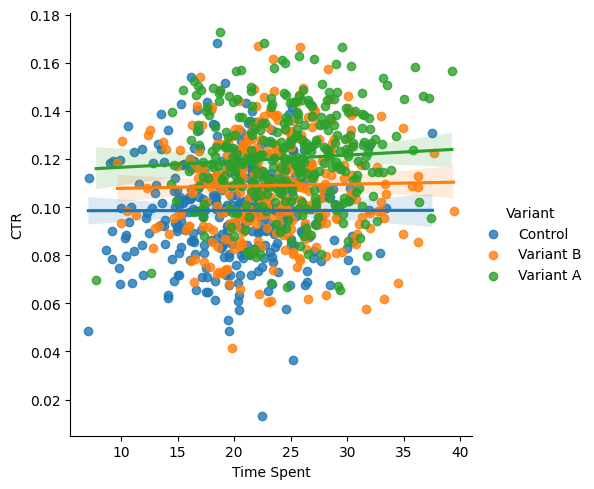

In [101]:
import seaborn as sns
sns.lmplot(data =  experiment, x='Time Spent', y='CTR', hue = 'Variant')

In [134]:
f_stat, p_val = stats.f_oneway(Variant_A, Variant_B, Control)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 93.58891593622702
P-value: 5.638952705781554e-38


In [138]:
experiment.groupby('Age')[['CTR', 'Time Spent']].mean()

,CTR,Time Spent
Age,,
18,0.104431,21.805160
19,0.113928,24.301099
20,0.106769,22.658484
21,0.106317,23.174444
22,0.111566,23.339777
23,0.111024,21.203465
24,0.109765,21.505956
25,0.109907,23.541231
26,0.110061,22.598906


In [139]:
experiment.groupby('Location')[['CTR', 'Time Spent']].mean()

,CTR,Time Spent
Location,,
Location1,0.110217,22.707286
Location2,0.108517,22.648998
Location3,0.108708,22.787691


In [140]:
location_1_CTR = experiment[experiment['Location'] == 'Location1']['CTR']
location_2_CTR = experiment[experiment['Location'] == 'Location2']['CTR']
location_3_CTR = experiment[experiment['Location'] == 'Location3']['CTR']

p_val = stats.f_oneway(location_1_CTR, location_2_CTR, location_3_CTR)
print(p_val)

F_onewayResult(statistic=0.5792245145655729, pvalue=0.5605211716238133)


In [141]:
location_1_timespent = experiment[experiment['Location'] == 'Location1']['Time Spent']
location_2_timespent = experiment[experiment['Location'] == 'Location2']['Time Spent']
location_3_timespent = experiment[experiment['Location'] == 'Location3']['Time Spent']

p_val = stats.f_oneway(location_1_timespent, location_2_timespent, location_3_timespent)
print(p_val)

F_onewayResult(statistic=0.053578839670573676, pvalue=0.9478339402848069)


In [142]:
experiment.groupby('Device')[['CTR', 'Time Spent']].mean()

,CTR,Time Spent
Device,,
Device1,0.109634,22.635032
Device2,0.109868,22.890021
Device3,0.107993,22.612276


In [143]:
device_1_CTR = experiment[experiment['Device'] == 'Device1']['CTR']
device_2_CTR = experiment[experiment['Device'] == 'Device2']['CTR']
device_3_CTR = experiment[experiment['Device'] == 'Device3']['CTR']

p_val = stats.f_oneway(device_1_CTR, device_2_CTR, device_3_CTR)
print(p_val)

F_onewayResult(statistic=0.7105872492654717, pvalue=0.4916042399968955)


In [144]:
device_1_timespent = experiment[experiment['Device'] == 'Device1']['Time Spent']
device_2_timespent = experiment[experiment['Device'] == 'Device2']['Time Spent']
device_3_timespent = experiment[experiment['Device'] == 'Device3']['Time Spent']

p_val = stats.f_oneway(device_1_timespent, device_2_timespent, device_3_timespent)
print(p_val)

F_onewayResult(statistic=0.26645371811833884, pvalue=0.7661459958744103)


Since it is confirmed that users across locations and with various devices have similar characteristics, we can design an experiment that can help increase click-through rate (CTR) or time spent on the application. 
